In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS/blob/master/lab9/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data


In [ ]:
!ls kaggle.json

kaggle.json


In [ ]:
!chmod 600 kaggle.json

In [ ]:
import json
import os 
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [ ]:
!kaggle competitions download -c higgs-boson

random_submission.zip: Skipping, found more recently modified local copy (use --force to force download)
User cancelled operation


In [ ]:
!unzip test.zip
!unzip training.zip

Archive:  test.zip
  inflating: test.csv                
Archive:  training.zip
  inflating: training.csv            


In [ ]:
import pandas as pd
data = pd.read_csv("training.csv")

In [ ]:
data.head() 
# ci sono missing values: -999.000
# contare quanti ce ne sono per colonna e vedere se eliminarla
# sostituire con NaN
# si deve togliere l'indice perchè potrebbe riflettere l'organizzazione dei dati

# target variables: Label & weight

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [ ]:
data.describe() # per le variabili numeriche

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [ ]:
data.Label.unique() # per vedere quali elementi contiene una variabile categorica

array(['s', 'b'], dtype=object)

In [ ]:
import pylab as pl
import numpy as np

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


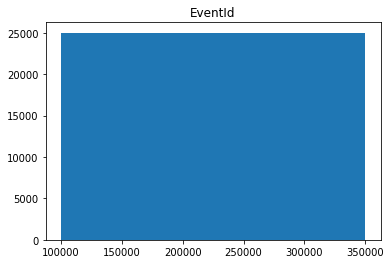

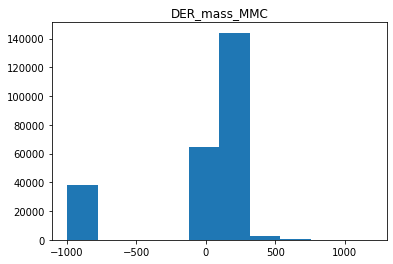

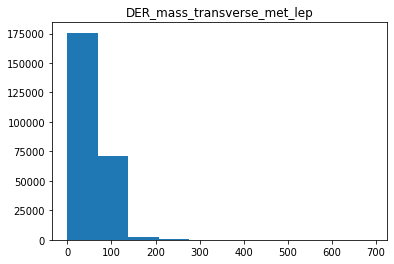

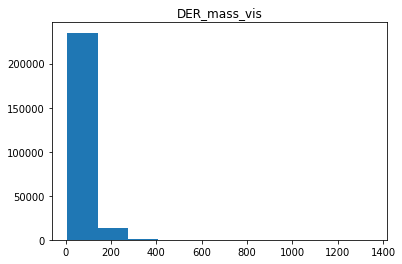

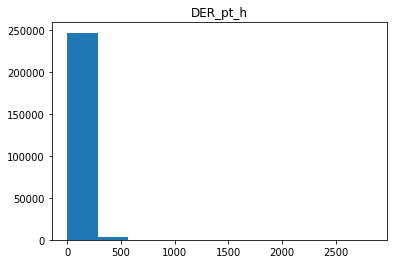

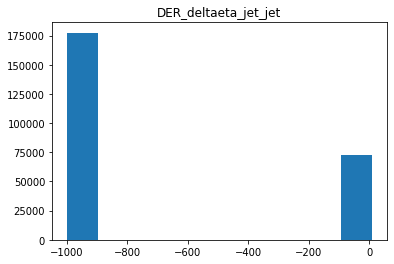

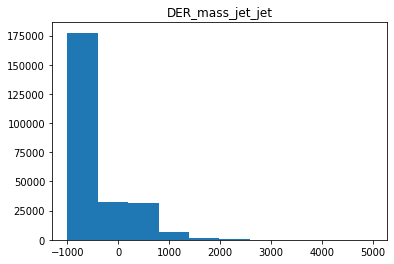

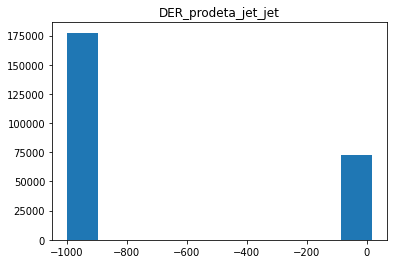

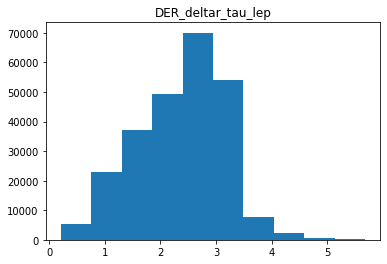

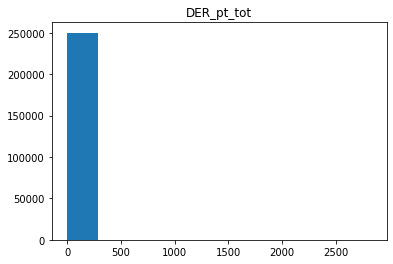

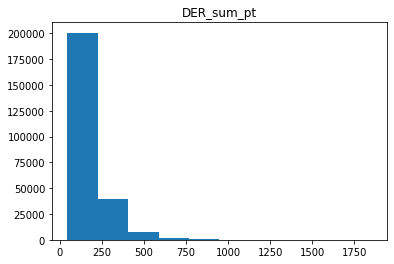

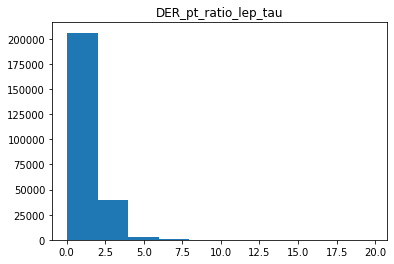

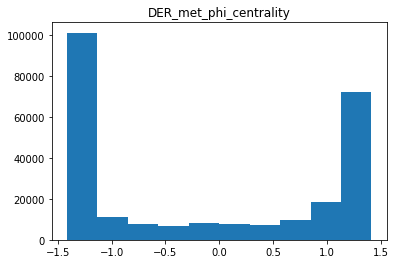

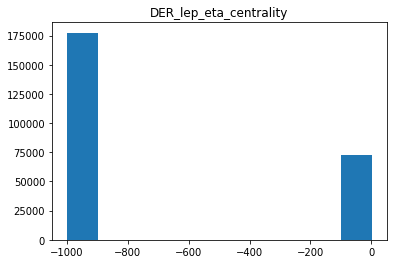

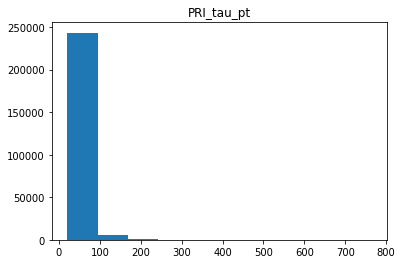

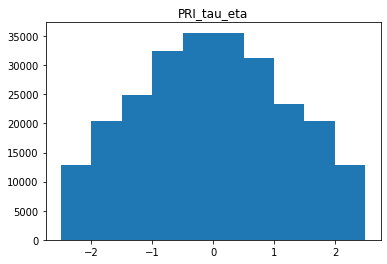

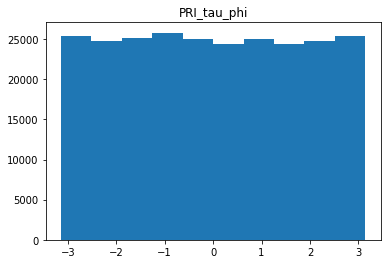

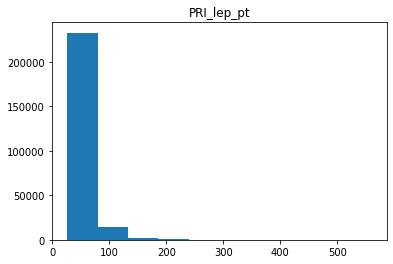

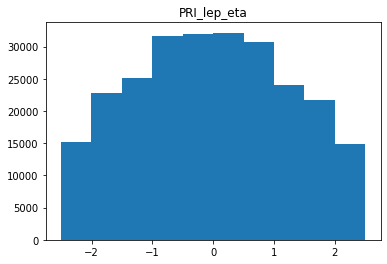

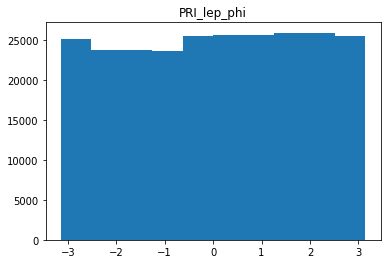

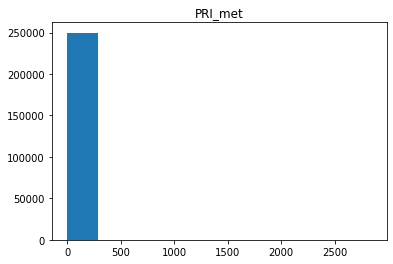

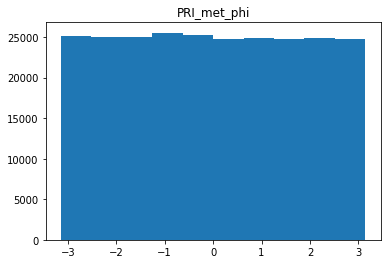

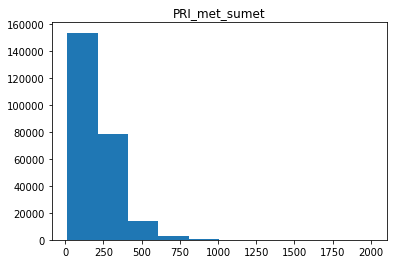

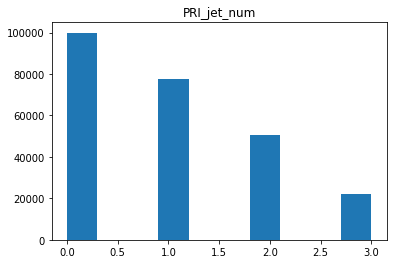

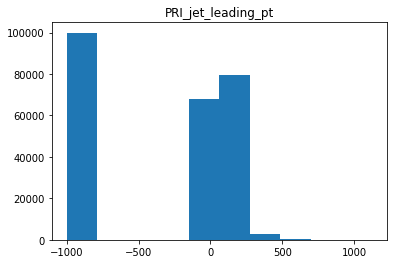

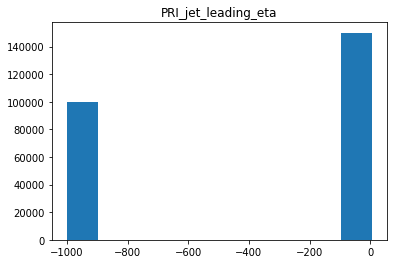

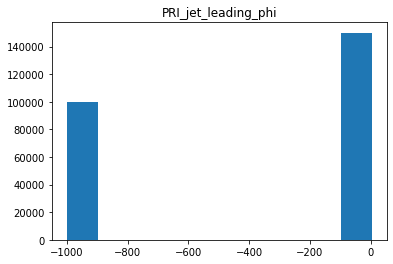

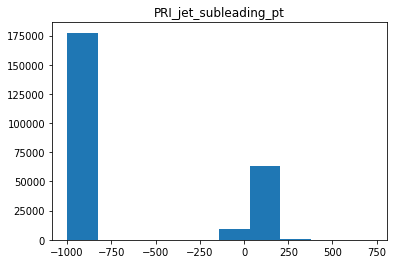

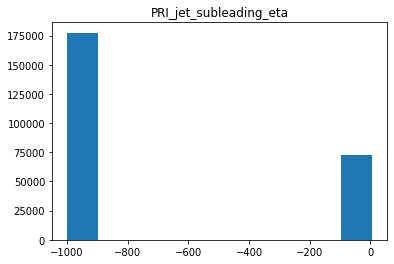

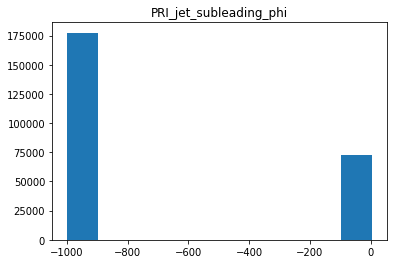

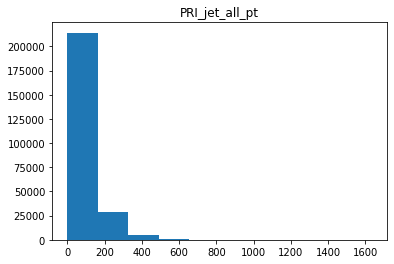

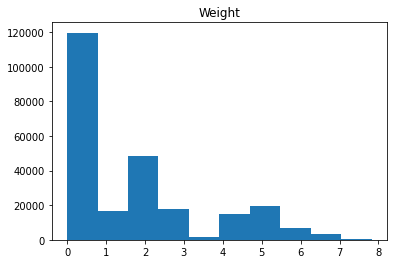

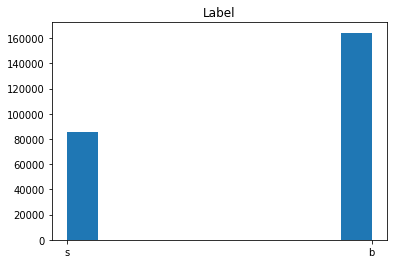

In [ ]:
# istogramma delle variabili --> si nota che ci sono missing values codificati in -999.0
# a volte sono anche più dei valori validi
# il primo istogramma è riferito al codice identificativo
# le variabili non sono gaussiane
for c in data.columns:
  pl.figure()
  pl.hist(data[c])
  pl.title(c)

In [ ]:
# per vedere la correlazione tra le variabili ma richiede molto tempo e ha senso se non sono troppe
# pd.plotting.scatter_matrix(dataframe, alpha = 0.2)

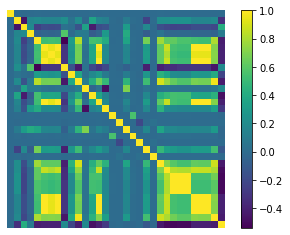

In [ ]:
pl.imshow(data.corr())
pl.colorbar();
pl.axis("off");

In [ ]:
higgsWnan = data.replace(-999.0, np.nan) #, inplace = True)

Al posto di eliminare i dati mancanti, si imputa un valore in base alla media dei 2 primi vicini tramite KNN:

In [ ]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors = 2)
# higgsFilled = imputer.fit_transform(scaledHiggs)

In [ ]:
higgsWnan.describe() # la prima riga mostra quanti valori sono validi per ogni colonna rispetto ai 250000 di partenza

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,211886.000000,250000.000000,250000.000000,250000.000000,72543.000000,72543.000000,72543.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,72543.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,150087.000000,150087.000000,150087.000000,72543.000000,72543.000000,72543.000000,250000.000000,250000.000000
mean,224999.500000,121.858528,49.239819,81.181982,57.895962,2.403735,371.783360,-0.821688,2.373100,18.917332,158.432217,1.437609,-0.128305,0.458290,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,73.064591,1.646767
std,72168.927986,57.298157,35.344886,40.828691,63.655682,1.742226,397.699325,3.584362,0.782911,22.273494,115.706115,0.844743,1.193585,0.398681,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,60.662276,1.784546,1.813385,31.985782,2.031743,1.816950,98.015662,1.875103
min,100000.000000,9.044000,0.000000,6.329000,0.000000,0.000000,13.602000,-18.066000,0.208000,0.000000,46.104000,0.047000,-1.414000,0.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,30.000000,-4.499000,-3.142000,30.000000,-4.500000,-3.142000,0.000000,0.001502
25%,162499.750000,91.885250,19.241000,59.388750,14.068750,0.882500,111.977000,-2.629000,1.810000,2.841000,77.550000,0.883000,-1.371000,0.004000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,44.422500,-1.342000,-1.584000,37.312000,-1.612000,-1.576500,0.000000,0.018636
50%,224999.500000,112.406000,46.524000,73.752000,38.467500,2.107000,225.885000,-0.244000,2.491500,12.315500,120.664500,1.280000,-0.356000,0.454000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,65.561000,0.000000,-0.033000,47.902000,-0.010000,-0.002000,40.512500,1.156188
75%,287499.250000,135.482000,73.598000,92.259000,79.169000,3.690000,478.226000,0.958000,2.961000,27.591000,200.478250,1.777000,1.225000,0.879000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,103.342000,1.336000,1.562000,66.637000,1.589500,1.576000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [ ]:
# higgsclean = higgsWnan.drop(['PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi'], axis = 1)
# si dovrebbe poi controllare che non siano stati inseriti bias nelle distribuzioni delle variabili dopo l'eliminazione

In [ ]:
higgsWnan.drop(['EventId'], axis = 1, inplace = True)

In [ ]:
higgsWnan.isna().sum()

DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177457
DER_mass_jet_jet               177457
DER_prodeta_jet_jet            177457
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         177457
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt              99913
PRI_jet_leading_eta             99913
PRI_jet_leading_phi             99913
PRI_jet_subl

In [ ]:
higgsclean = higgsWnan.dropna() # si eliminano le righe contententi almeno un valore non valido

In [ ]:
higgsclean.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.200,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,0.002653,s
5,100005,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,0.588,0.479,0.975,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660,0.083414,b
6,100006,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,3.371,1.393,0.791,28.850,1.113,2.409,97.240,0.675,-0.966,38.421,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877,0.002653,s
11,100011,114.744,10.286,75.712,30.816,2.563,252.599,-1.401,2.888,36.745,239.804,1.061,1.364,0.769,35.976,-0.669,-0.342,38.188,-0.165,2.502,22.385,2.148,290.547,3,76.773,-0.790,0.303,56.876,1.773,-2.079,165.640,0.307170,b
23,100023,141.481,0.736,111.581,174.075,1.955,364.344,-0.923,1.335,6.663,440.859,0.652,1.042,0.207,98.565,0.190,-1.506,64.285,1.405,-0.952,17.960,-0.973,454.785,2,195.533,1.156,1.416,82.477,-0.798,-2.785,278.009,0.001503,s


In [ ]:
higgsclean.describe() # restano circa 68000 valori

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000
mean,225035.224154,122.816184,35.270300,78.496815,111.430393,2.434232,378.176455,-0.881020,1.996525,27.356644,281.524727,1.480924,0.637307,0.463833,45.716667,-0.003367,0.001104,52.433431,-0.003671,0.041897,54.959294,0.006987,334.677667,2.303711,106.879969,-0.005791,-0.011564,57.915426,-0.012930,-0.004782,183.374631,0.445788
std,72243.940540,60.751559,30.750262,40.728784,76.318688,1.750700,400.784254,3.592624,0.774636,28.266913,130.245426,1.097985,0.924876,0.398422,29.681876,1.179442,1.818341,28.798872,1.197358,1.815463,42.690672,1.813892,139.867044,0.459863,68.165852,1.746442,1.809276,32.224318,2.044065,1.817247,108.312736,0.747552
min,100000.000000,9.878000,0.000000,7.330000,0.120000,0.000000,13.602000,-18.066000,0.228000,0.004000,110.601000,0.047000,-1.414000,0.000000,20.000000,-2.496000,-3.141000,26.001000,-2.487000,-3.142000,0.200000,-3.142000,34.323000,2.000000,30.196000,-4.497000,-3.142000,30.000000,-4.500000,-3.142000,60.223000,0.001502
25%,162349.750000,93.320250,11.320000,57.274250,57.827000,0.897000,113.463000,-2.729000,1.397000,4.218000,192.844250,0.762250,0.191000,0.005000,26.589250,-0.889000,-1.570000,33.280250,-0.908750,-1.518000,27.081000,-1.550000,239.168250,2.000000,60.844500,-1.339000,-1.574000,37.392250,-1.628750,-1.579000,109.472000,0.001503
50%,225288.000000,113.230000,26.964000,70.930000,94.714000,2.146500,232.370500,-0.284000,1.940000,22.542000,246.719500,1.206000,1.071000,0.469000,36.590500,-0.011000,-0.010000,43.450000,-0.009000,0.077000,44.292000,0.005000,305.170000,2.000000,87.369000,0.000000,-0.032000,48.105500,-0.014000,-0.008000,154.136500,0.064061
75%,287772.750000,133.455750,52.202750,88.372000,145.824750,3.741000,489.447750,0.921000,2.574000,39.067750,331.105000,1.854000,1.342000,0.883000,54.194250,0.879750,1.580000,61.482000,0.904000,1.609000,69.416250,1.573000,396.382500,3.000000,131.069000,1.330000,1.558000,66.946500,1.604000,1.573000,223.595250,0.744056
max,349994.000000,988.199000,594.287000,789.538000,1053.807000,8.503000,4974.979000,16.648000,5.579000,466.525000,1852.462000,19.773000,1.414000,1.000000,622.862000,2.497000,3.142000,461.896000,2.499000,3.141000,951.363000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.805035


# Tree methods


- Read in the trainind data. Split the provided training data into a training and a test set. 
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [ ]:
# target: quello che si vuole predire
labels = higgsclean[["Label"]]
weights = higgsclean[["Weight"]]
# --> restano data.columns[:-2]

In [ ]:
labels # target variable categorica per il classifier

,Label
0,s
5,b
6,s
11,b
23,s
...,...
249976,s
249980,s
249985,s
249993,s


In [ ]:
weights # da predire col regressor

,Weight
0,0.002653
5,0.083414
6,0.002653
11,0.307170
23,0.001503
...,...
249976,0.001503
249980,0.018636
249985,0.018636
249993,0.001503


In [ ]:
inputdata = higgsclean[higgsclean.columns[:-2]]

Normalizzare prima di dividere in training e test perchè i dati potrebbero essere biased!

Non è indispensabile scalare i dati perchè ogni variabile è utilizzata indipendentemente dalle altre per suddividere i dati ad ogni nodo. Se due variabili sono covarianti e contengono la stessa informazione, nella suddivisione una delle due viene ignorata. Questo è un problema per la scelta della variabile che conta.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
traindata, testdata, train_label, test_label = train_test_split(inputdata, labels, train_size = 0.75, test_size = 0.25, random_state = 742)
# 75% / 25% se si hanno abbastanza dati
# se non si hanno abbastanza dati, si può fare cross validation

- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [ ]:
#leave 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 0)
print('Parameters currently in use:\n')
import pprint
pp = pprint.PrettyPrinter()
pp.pprint(rf.get_params()) # valori di default per l'algoritmo di random forest

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


non è necessario scalare i dati perchè trattano una feature alla volta, quindi non serve che siano comparabili, per lo stesso motivo non ci si preoccupa della covariance

In [ ]:
gbt = GradientBoostingClassifier(random_state = 0)

In [ ]:
rf.fit(traindata, train_label)
gbt.fit(traindata, train_label)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

calculate the  scores for the training and test sets and evaluate  overtraining etc

In [ ]:
rf.score(traindata, train_label), rf.score(testdata, test_label) # accuratezza

(1.0, 0.8442069411004757)

In [ ]:
gbt.score(traindata, train_label), gbt.score(testdata, test_label)

(0.847998433982578, 0.8411533266780199)

In [ ]:
rf.feature_importances_

array([0.20915285, 0.04272357, 0.07861272, 0.02606575, 0.04929902,
       0.04275387, 0.04896469, 0.0358121 , 0.03264912, 0.01712788,
       0.02226772, 0.04328149, 0.04724641, 0.03254228, 0.0181684 ,
       0.01616909, 0.01789307, 0.01763671, 0.0156499 , 0.02710809,
       0.01576731, 0.01810461, 0.00853478, 0.01605544, 0.01666175,
       0.01638872, 0.01731485, 0.01692087, 0.01674705, 0.01637989])

In [ ]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

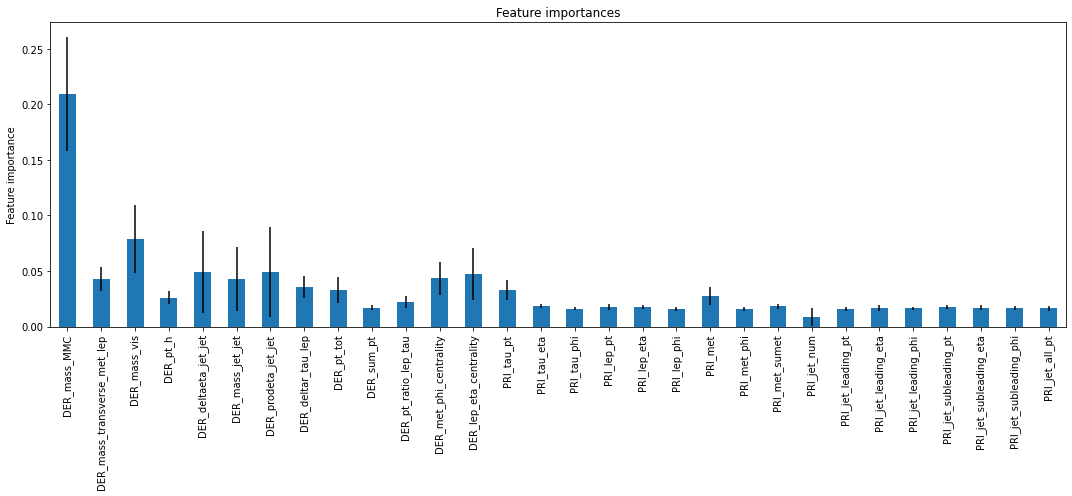

In [ ]:
forest_importances = pd.Series(importances, index=traindata.columns)
fig, ax = pl.subplots(figsize = (15,7))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Feature importance")
fig.tight_layout()

In [ ]:
index = np.argsort(importances)[::-1]
importances_sort = importances[index]
std_sort = std[index]
features = traindata.columns[index] 

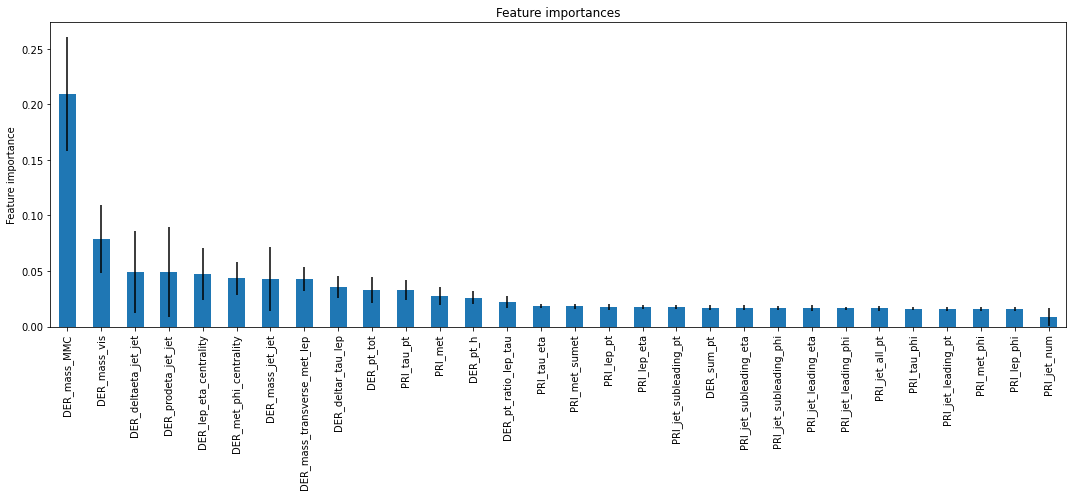

In [ ]:
forest_importances = pd.Series(importances_sort, index=features)
fig, ax = pl.subplots(figsize = (15,7))
forest_importances.plot.bar(yerr=std_sort, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Feature importance")
fig.tight_layout()

- Produce a confusion matrix for each model and compare them


 



In [ ]:
# I creaded this function (mostly copied from sklearn examples). 
# You can use it to create the confusion matrix
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='',
                          cmap=pl.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """         
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(cm, cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    pl.xticks([0, 1], labels=["N", "P"])
    pl.ylim(-0.5,1.5)
    pl.yticks([0,1], labels=["N", "P"])    
    pl.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = plt.colorbar(im, cax=cax)

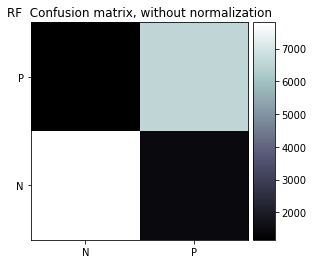

In [ ]:
plot_confusion_matrix(test_label, rf.predict(testdata), title = "RF ")

Confusion matrix: sulla diagonale ci sono i true positive & negative, mentre sul fuori diagonale i false positive & negative; oppure corretta classificazione sulla diagonale e sul fuori diagonale s che doveva essere b e viceversa

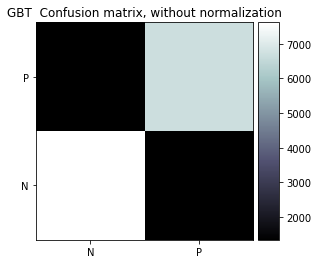

In [ ]:
plot_confusion_matrix(test_label, gbt.predict(testdata), title = "GBT ")


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [ ]:
traindata_weights, testdata_weights, train_weights, test_weights = train_test_split(higgsclean[higgsclean.columns[:-2]],
                                                                                    weights, train_size = 0.75, test_size = 0.25, random_state = 742)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
rfR = RandomForestRegressor(n_estimators=100, max_depth=3,
                                  random_state=0)
rfR.fit(traindata_weights, train_weights)
gbtR = GradientBoostingRegressor(n_estimators=100, max_depth=3,
                                  random_state=0)
gbtR.fit(traindata_weights, train_weights)
print(rfR.feature_importances_)
print(gbtR.feature_importances_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.00000000e+00 7.04191033e-04 2.71618636e-01 3.68369802e-01
 0.00000000e+00 0.00000000e+00 2.34350067e-01 0.00000000e+00
 2.95590887e-04 5.04095666e-03 1.04792675e-02 0.00000000e+00
 1.28692182e-02 0.00000000e+00 8.11750032e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.49425861e-03 9.97286033e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.30148608e-04]
[4.62832277e-04 1.09204199e-01 1.78795155e-01 1.77183418e-01
 8.11589914e-04 1.85722885e-02 1.28283205e-01 5.66834605e-03
 1.74021831e-02 3.13996676e-02 2.71270673e-02 2.13743279e-02
 8.53752509e-02 1.73331994e-02 1.14054030e-01 1.04894332e-03
 4.73149346e-04 2.33223350e-04 1.80096962e-03 0.00000000e+00
 3.50007691e-03 0.00000000e+00 1.13636547e-02 1.18127153e-02
 2.49377641e-03 1.30604208e-03 8.91318175e-04 5.64132521e-03
 1.87963612e-03 4.23675335e-05 2.44660415e-02]


Text(0, 0.5, 'RF Feature Importance')

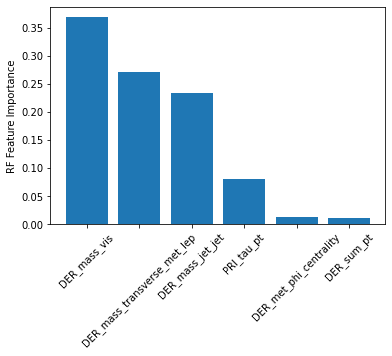

In [ ]:
rf_fi = rfR.feature_importances_
index = np.argsort(fi)[::-1]
y = rf_fi[index[:6]]
x = higgsclean.columns[index[:6]]
pl.bar(x,y)
pl.xticks(rotation = 45)
pl.ylabel('RF Feature Importance')

Text(0, 0.5, 'RF Feature Importance')

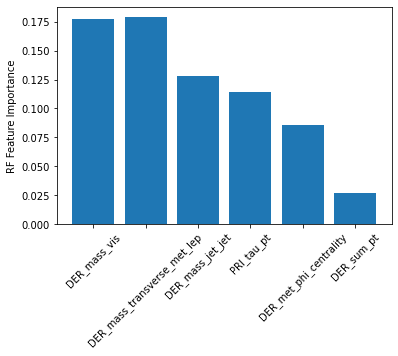

In [ ]:
gbt_fi = gbtR.feature_importances_
index = np.argsort(fi)[::-1]
y = gbt_fi[index[:6]]
x = higgsclean.columns[index[:6]]
pl.bar(x,y)
pl.xticks(rotation = 45)
pl.ylabel('RF Feature Importance')

In [ ]:
rfR.predict(testdata_weights)

array([1.54028732, 0.12082269, 0.12082269, ..., 0.45730802, 0.12082269,
       0.43936777])

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [ ]:
print("L2 RF", ((rfR.predict(testdata_weights) - test_weights.values.flatten()) ** 2).sum())

L2 RF 6695.061418426434


In [ ]:
print("L2 GBT", ((gbtR.predict(testdata_weights) - test_weights.values.flatten()) ** 2).sum())

L2 GBT 5342.0834434421995


- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)

Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

 



In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

**bootstrap**: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

**max_features**: The number of features to consider when looking for the best split:
* If “auto”, then max_features=n_features.
* If “sqrt”, then max_features=sqrt(n_features).

In [3]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [10, 100] #, 1000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [3, 10] #, 100]
max_depth.append(None)
# Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap
               #...
              }
pp.pprint(random_grid)

 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

**n_iter**: Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.

**cv**: Determines the cross-validation splitting strategy.

**iid**: boolean, default=True

If True, the data is assumed to be identically distributed across the folds, and the loss minimized is the total loss per sample, and not the mean loss across the folds.

**n_jobs**: Number of jobs to run in parallel. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 18 different combinations
random_search_rf = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
                                   n_iter=15, cv=4, iid=False, n_jobs=-1)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [ ]:
# features --> in ordine di importanza
traindata_fi = traindata[features[:4]]

In [ ]:
traindata_fi.head()

,DER_mass_MMC,DER_mass_vis,DER_deltaeta_jet_jet,DER_prodeta_jet_jet
69148,161.760,119.609,2.888,-1.053
189266,94.468,68.567,2.996,-0.650
163191,130.912,80.758,4.811,-4.756
69041,93.338,48.628,2.328,0.484
214218,102.933,66.750,2.790,0.925


In [ ]:
random_search_rf.fit(traindata_fi, train_label)                  

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and wi

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

fit(X[, y, groups]) --> Run fit with all sets of parameters.

**best_estimator_**: Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data.

**best_score_**: Mean cross-validated score of the best_estimator.

**best_params_**: Parameter setting that gave the best results on the hold out data.

In [ ]:
random_search_rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
print("Tuned RF  Parameters: {}".format(random_search_rf.best_params_))
print("Best score is {}".format(random_search_rf.best_score_))

Tuned RF  Parameters: {'n_estimators': 100, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}
Best score is 0.7934422808123213


In [ ]:
df = pd.DataFrame(random_search.cv_results_)

In [ ]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,8.662383,0.103444,0.433476,0.007794,100,auto,None,True,"{'n_estimators': 100, 'max_features': 'auto', ...",0.794527,0.793575,0.792225,0.793442,0.000945,1


In [ ]:
random_grid = {'max_depth': [3, 10, None],
               'max_features': ['auto', 'sqrt'],
               'n_estimators': [10, 100]}

In [ ]:
random_search_gbt = RandomizedSearchCV(estimator = gbt, param_distributions=random_grid,
                                   n_iter=1, cv=3, iid=False)

In [ ]:
random_search_gbt.fit(traindata_fi, train_label)    

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [ ]:
print("Tuned RF  Parameters: {}".format(random_search_gbt.best_params_))
print("Best score is {}".format(random_search_gbt.best_score_))

Tuned RF  Parameters: {'n_estimators': 10, 'max_features': 'auto', 'max_depth': None}
Best score is 0.7235195584198721


# Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it. 

In [ ]:
rf_best = RandomForestClassifier(n_estimators=100, max_features='auto', bootstrap='True', random_state=742)

In [ ]:
gbt_best = GradientBoostingClassifier(n_estimators=10, max_features='auto')

In [ ]:
traindata.shape

(51085, 30)

In [ ]:
train_label.shape

(51085, 1)

In [ ]:
rf_best.fit(traindata, train_label) #.values.flatten()=="s")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap='True', ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=742,
                       verbose=0, warm_start=False)

In [ ]:
gbt_best.fit(traindata, train_label)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

ROC: solo per classificatori binari!

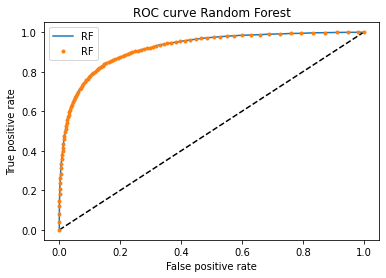

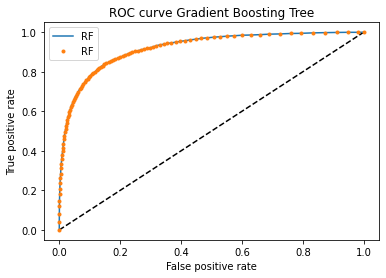

In [ ]:
# The random forest model by itself
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_pred_grd_rfcat = rf_best.predict_proba(testdata)[:, 1]
y_pred_grd_gbtcat = gbt_best.predict_proba(testdata)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(test_label.values.flatten()=="s", y_pred_grd_rfcat)
fpr_gbt, tpr_gbt, _ = roc_curve(test_label.values.flatten()=="s", y_pred_grd_rfcat)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, '.', label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve Random Forest')
plt.legend(loc='best')

plt.figure(2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gbt, tpr_gbt)
plt.plot(fpr_gbt, tpr_gbt, '.', label='GBT')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve Gradient Boosting Tree')
plt.legend(loc='best')

Receiver Operating Characteristic (ROC) metric to evaluate classifier output quality.
ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

In [ ]:
from sklearn.metrics import auc # area under curve
roc_auc = auc(fpr_rf, tpr_rf)
print("Area under the curve: %f"%roc_auc)

Area under the curve: 0.921258


In [ ]:
roc_auc = auc(fpr_gbt, tpr_gbt)
print("Area under the curve: %f"%roc_auc)

Area under the curve: 0.921258


# t-SNE

In [ ]:
from sklearn import manifold
data = higgsclean
data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.200,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,0.002653,s
5,100005,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,0.588,0.479,0.975,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660,0.083414,b
6,100006,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,3.371,1.393,0.791,28.850,1.113,2.409,97.240,0.675,-0.966,38.421,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877,0.002653,s
11,100011,114.744,10.286,75.712,30.816,2.563,252.599,-1.401,2.888,36.745,239.804,1.061,1.364,0.769,35.976,-0.669,-0.342,38.188,-0.165,2.502,22.385,2.148,290.547,3,76.773,-0.790,0.303,56.876,1.773,-2.079,165.640,0.307170,b
23,100023,141.481,0.736,111.581,174.075,1.955,364.344,-0.923,1.335,6.663,440.859,0.652,1.042,0.207,98.565,0.190,-1.506,64.285,1.405,-0.952,17.960,-0.973,454.785,2,195.533,1.156,1.416,82.477,-0.798,-2.785,278.009,0.001503,s


In [ ]:
data = data.drop(["EventId", "Label"], axis = 1)

In [ ]:
data.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
0,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.200,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,0.002653
5,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,0.588,0.479,0.975,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660,0.083414
6,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,3.371,1.393,0.791,28.850,1.113,2.409,97.240,0.675,-0.966,38.421,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877,0.002653
11,114.744,10.286,75.712,30.816,2.563,252.599,-1.401,2.888,36.745,239.804,1.061,1.364,0.769,35.976,-0.669,-0.342,38.188,-0.165,2.502,22.385,2.148,290.547,3,76.773,-0.790,0.303,56.876,1.773,-2.079,165.640,0.307170
23,141.481,0.736,111.581,174.075,1.955,364.344,-0.923,1.335,6.663,440.859,0.652,1.042,0.207,98.565,0.190,-1.506,64.285,1.405,-0.952,17.960,-0.973,454.785,2,195.533,1.156,1.416,82.477,-0.798,-2.785,278.009,0.001503


In [ ]:
p = 30.0
ee = 12.0

In [ ]:
X_emb = manifold.TSNE(n_components = 2, perplexity = p).fit_transform(data.iloc[::10])

In [ ]:
X_emb

array([[ 47.239445 , -10.945986 ],
       [-12.082533 ,  27.080101 ],
       [-25.271154 , -23.307407 ],
       ...,
       [ 52.193222 ,  -0.9119394],
       [ -3.0343513,  49.315067 ],
       [ 62.521423 , -20.81902  ]], dtype=float32)

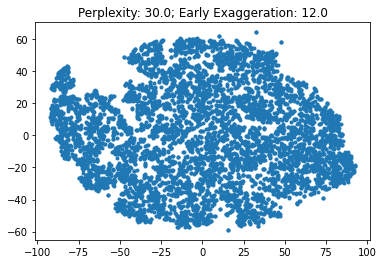

In [ ]:
pl.plot(X_emb[:,0], X_emb[:,1], '.')
pl.title('Perplexity: %.1f; Early Exaggeration: %.1f'%(p, ee));

In [ ]:
p2 = 30.0
ee2 = 20.0

In [ ]:
X_emb2 = manifold.TSNE(n_components = 2, perplexity = p2, early_exaggeration = ee2).fit_transform(data.iloc[::10])
# early_exaggeration: default = 12

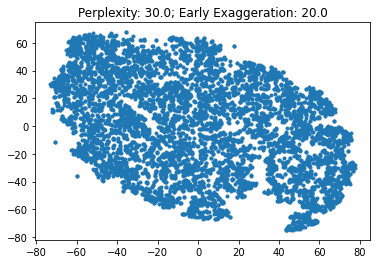

In [ ]:
pl.plot(X_emb2[:,0], X_emb2[:,1], '.')
pl.title('Perplexity: %.1f; Early Exaggeration: %.1f'%(p2, ee2));

In [ ]:
p3 = 30.0
ee3 = 5.0

In [ ]:
X_emb3 = manifold.TSNE(n_components = 2, perplexity = p3, early_exaggeration = ee3).fit_transform(data.iloc[::10])

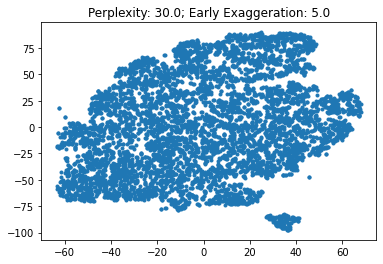

In [ ]:
pl.plot(X_emb3[:,0], X_emb3[:,1], '.')
pl.title('Perplexity: %.1f; Early Exaggeration: %.1f'%(p3, ee3));

In [ ]:
p4 = 10.0
ee4 = 12.0

In [ ]:
X_emb4 = manifold.TSNE(n_components = 2, perplexity = p4, early_exaggeration = ee4).fit_transform(data.iloc[::10])

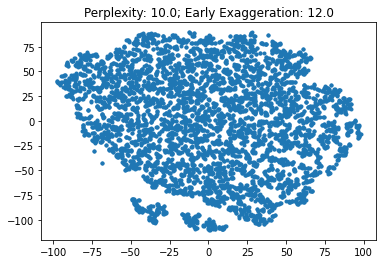

In [ ]:
pl.plot(X_emb4[:,0], X_emb4[:,1], '.')
pl.title('Perplexity: %.1f; Early Exaggeration: %.1f'%(p4, ee4));